<a href="https://colab.research.google.com/github/aminbaybon/8_miniprojs/blob/main/Spam_classifier_using_Randomforest_and_SVC_both_TfidfVectorizer_and_CountVectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **data**

In [3]:
df = pd.read_csv('sample_spam.tsv', sep='\t')

In [4]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


df: This refers to a DataFrame, which is a two-dimensional tabular

In [7]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


df.isna(): This part of the code generates a new DataFrame of the same shape as the original df, where each element is either True if it is a missing value (NaN or None) or False if it is not.

In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

.sum(): This function is applied to the DataFrame generated in the previous step. When used with a DataFrame, the sum() function treats True as 1 and False as 0. It sums up the values column-wise, giving the total count of missing values for each column.

In [8]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In Pandas, df.tail() is a method used to display the last few rows of a DataFrame. By default, it shows the last 5 rows, but you can pass an optional argument to specify a different number of rows to display.

For example, if you have a DataFrame named df, calling df.tail() will show the last 5 rows of the DataFrame. If you want to display a different number of rows, you can pass the desired number as an argument, like df.tail(10) to show the last 10 rows.

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In Pandas, df.describe() is a method used to generate descriptive statistics of a DataFrame. It provides a summary of the central tendency, dispersion, and shape of the distribution of numerical columns in the DataFrame.

Here's what the df.describe() method does:

For numerical columns, it calculates the following statistics:

Count: The number of non-missing (non-NaN) values in each column.
Mean: The average value of each column.
Standard Deviation: A measure of the spread of values around the mean.
Minimum: The minimum value in each column.
25th Percentile (Q1): The value below which 25% of the data falls.
Median (50th Percentile or Q2): The middle value of the data.
75th Percentile (Q3): The value below which 75% of the data falls.
Maximum: The maximum value in each column.
Non-numerical columns (e.g., object or categorical data) are excluded from the output.

In [10]:
df['label'].value_counts()/ (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

The code `df['label'].value_counts() / len(df)` is used to calculate the relative frequency (proportion) of each unique value in the 'label' column of the DataFrame df.

In [33]:
df['label'] == 'ham'

0        True
1        True
2       False
3        True
4        True
        ...  
5567    False
5568     True
5569     True
5570     True
5571     True
Name: label, Length: 5572, dtype: bool

 creates a boolean mask by comparing each value in the 'label' column with the string 'ham'. The result is a Series of boolean values, where each element is True if the corresponding row's 'label' value is 'ham', and False otherwise.

In [89]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

This code is used to split a DataFrame df into two separate DataFrames based on the values in the 'label' column. It assumes that the 'label' column contains two distinct values: 'ham' and 'spam'.

# **Using balance data**

In [90]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [39]:
ham = ham.sample(spam.shape[0])

 takes a random sample from the DataFrame ham, where the number of rows in the sample is equal to the number of rows in the DataFrame spam

In [40]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [41]:
data = ham.append(spam, ignore_index=True)

<ipython-input-41-ea3b8d22737f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


combines two DataFrames, ham and spam, into a single DataFrame named data. It appends the rows of spam DataFrame to the end of ham DataFrame, resulting in a new DataFrame with both 'ham' and 'spam' data merged together. combines two DataFrames, ham and spam, into a single DataFrame named data. It appends the rows of spam DataFrame to the end of ham DataFrame, resulting in a new DataFrame with both 'ham' and 'spam' data merged together.

In [42]:
data.shape

(1494, 4)

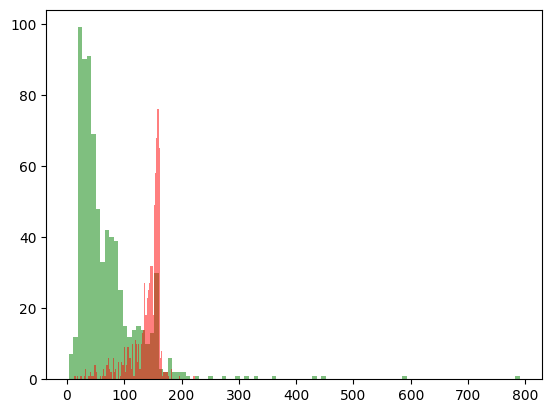

In [52]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.5 ,  color ='green')
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.5 ,  color ='red')
plt.show()

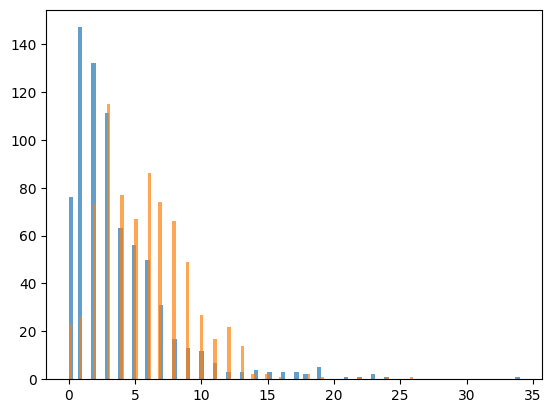

In [20]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [21]:
data

,label,message,length,punct
0,ham,Not thought bout it... || Drink in tap & spile...,111,13
1,ham,Weightloss! No more girl friends. Make loads o...,99,4
2,ham,HI ITS KATE CAN U GIVE ME A RING ASAP XXX,41,0
3,ham,"Sorry, I'll call later",22,2
4,ham,Ha ha ha good joke. Girls are situation seekers.,48,2
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.2, random_state =0, shuffle = True)

he code you provided is using the train_test_split function from Scikit-learn to split the data into training and testing sets for a machine learning model.

Here's what each part of the code does:

`data['message']`: This selects the 'message' column from the DataFrame data. It represents the input features (independent variables) that you want to use for training the model.

`data['label']`: This selects the 'label' column from the DataFrame data. It represents the target variable (dependent variable) that you want to predict using the model.

`test_size = 0.2`: This parameter sets the size of the testing dataset to 20% of the entire dataset. The remaining 80% of the data will be used for training the model.

`random_state = 0`: This parameter is used to set a random seed for reproducibility. When random_state is set to a specific value (e.g., 0), the data splitting will be the same each time you run the code, ensuring consistent results.

`shuffle = True`: This parameter determines whether to shuffle the data before splitting it into training and testing sets. Setting shuffle=True ensures that the data is randomly shuffled before splitting, which can help in getting a more representative split.

In [58]:
X_train.shape

(1195,)

In [59]:
X_test.shape

(299,)

In [60]:
type(X_train)

pandas.core.series.Series

In [61]:
X_train

465     Well, I was about to give up cos they all said...
1229    Do you want a New Nokia 3510i Colour Phone Del...
1400    Bored housewives! Chat n date now! 0871750.77....
1017    Call from 08702490080 - tells u 2 call 0906635...
425     U sleeping now.. Or you going to take? Haha.. ...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                              We still on for tonight?
684     Night has ended for another day, morning has c...
Name: message, Length: 1195, dtype: object

In [62]:
X_test

799     Ur cash-balance is currently 500 pounds - to m...
1047    FreeMsg: Hey - I'm Buffy. 25 and love to satis...
1436    TheMob>Hit the link to get a premium Pink Pant...
54      Great. I was getting worried about you. Just k...
793     Think ur smart ? Win £200 this week in our wee...
                              ...                        
621     I will cme i want to go to hos 2morow. After t...
140     Your board is working fine. The issue of overh...
1433    WIN a £200 Shopping spree every WEEK Starting ...
693                 If e timing can, then i go w u lor...
39               Tee hee. Off to lecture, cheery bye bye.
Name: message, Length: 299, dtype: object

In [63]:
y_train

465      ham
1229    spam
1400    spam
1017    spam
425      ham
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1195, dtype: object

In [64]:
y_test

799     spam
1047    spam
1436    spam
54       ham
793     spam
        ... 
621      ham
140      ham
1433    spam
693      ham
39       ham
Name: label, Length: 299, dtype: object

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

### **Notice**

When working with text data, you need to convert the text into numerical representations before feeding it into a machine learning model like SVM or Random Forest. There are several ways to do this, and the most common approach is to use text vectorization techniques. Two popular methods are:

**Bag-of-Words (BoW)**: This method converts text into a numerical representation by creating a vocabulary of unique words in the entire dataset and counting the frequency of each word in each document (text sample). It represents each document as a vector of word frequencies. You can use CountVectorizer from Scikit-learn to implement BoW.

**Term Frequency-Inverse Document Frequency (TF-IDF)**: TF-IDF is similar to BoW but takes into account the importance of each word in the entire dataset by penalizing frequently occurring words. It gives higher weights to words that are more informative in distinguishing between different documents. You can use TfidfVectorizer from Scikit-learn to implement TF-IDF

### **Random Forest**

In [66]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=200))])

 creates a Scikit-learn Pipeline object that combines two steps: text vectorization using TfidfVectorizer and classification using RandomForestClassifier. A Pipeline allows you to chain multiple processing steps together, making it easier to apply the same preprocessing steps consistently during training and testing.


---


` **TfidfVectorizer**()`: This is the first step in the pipeline, where the text data will be converted into numerical representations using the Term Frequency-Inverse Document Frequency (TF-IDF) technique. This vectorization step considers the importance of each word in the entire dataset and assigns weights to words based on their frequency across the documents.


---


`RandomForestClassifier(n_estimators=200):` This is the second step in the pipeline, where a Random Forest Classifier is used for classification. The RandomForestClassifier is an ensemble learning method that builds multiple decision trees and combines their predictions to make the final classification. The n_estimators parameter is set to 200, which specifies the number of trees in the random forest.


---


`Pipeline([...])`: The Pipeline constructor takes a list of tuples as an argument, where each tuple contains the name of the step and the corresponding object. In this case, the steps are the TfidfVectorizer and RandomForestClassifier, and their names are "tfidf" and "classifier", respectively.

---
The pipeline ensures that the text data is first transformed using TfidfVectorizer, and then the transformed data is passed to the RandomForestClassifier for training and prediction. This way, you can use the entire pipeline as a single estimator, making it easier to train and evaluate the model consistently.

After creating the Pipeline, you can use it just like any other Scikit-learn estimator. For example, you can use the fit() method to train the model and the predict() method to make predictions on new data.


In [67]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [68]:
y_pred = classifier.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred)

0.959866220735786

In [72]:
confusion_matrix(y_test, y_pred)

array([[151,   0],
       [ 12, 136]])

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       151
        spam       1.00      0.92      0.96       148

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



### **SVC**

In [74]:
from sklearn.svm import SVC

In [75]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [76]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [77]:
y_pred = svm.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.9431438127090301

In [79]:
confusion_matrix(y_test, y_pred)

array([[148,   3],
       [ 14, 134]])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.95       151
        spam       0.98      0.91      0.94       148

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [84]:
test1 = ['Hello dr.fathi my name is amin i want to introduce you a new machine that will help ypu. you can buy it from us, email me']
test2 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']
test3 = ['ok sir i will call you']

In [88]:
print(classifier.predict(test1) , svm.predict(test1))
print(classifier.predict(test2) , svm.predict(test2))
print(classifier.predict(test3) , svm.predict(test3))

['ham'] ['ham']
['ham'] ['ham']
['spam'] ['spam']


# **Using whole data**

In [92]:
data2 = ham.append(spam, ignore_index=True)

<ipython-input-92-cfda2d104f5f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = ham.append(spam, ignore_index=True)


In [93]:
data2.shape

(5572, 4)

In [94]:
X_train, X_test, y_train, y_test =  train_test_split(data2['message'], data2['label'], test_size = 0.2, random_state =0, shuffle = True)

## TfidfVectorizer

In [97]:
# Vectorize text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### **Random Forest**

In [98]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions using Random Forest classifier
rf_y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 0.98
Random Forest Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       983
        spam       1.00      0.86      0.92       132

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Random Forest Confusion Matrix:
[[983   0]
 [ 19 113]]


### **SVM**

In [100]:
# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_vectorized, y_train)

# Make predictions using SVM classifier
svm_y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate SVM classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))

SVM Accuracy: 0.99
SVM Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       983
        spam       1.00      0.89      0.94       132

    accuracy                           0.99      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.99      0.99      1115

SVM Confusion Matrix:
[[983   0]
 [ 15 117]]


## CountVectorizer

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### **Random Forest**

In [104]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions using Random Forest classifier
rf_y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 0.98
Random Forest Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       983
        spam       0.99      0.87      0.93       132

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Random Forest Confusion Matrix:
[[982   1]
 [ 17 115]]


### **SVM**

In [105]:
# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_vectorized, y_train)

# Make predictions using SVM classifier
svm_y_pred = svm_classifier.predict(X_test_vectorized)

# Evaluate SVM classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))

SVM Accuracy: 0.98
SVM Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       983
        spam       1.00      0.87      0.93       132

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.98      0.98      1115

SVM Confusion Matrix:
[[983   0]
 [ 17 115]]


# The results
can be different when using **CountVectorizer** and **TfidfVectorizer** for text data representation. The key difference between the two vectorization techniques lies in how they assign weights to the words in the text.

CountVectorizer: It simply counts the frequency of each word in the text. It represents each document as a vector of word frequencies. In other words, it does not consider the importance of individual words in distinguishing between different documents. The values in the vector represent the raw frequency counts.

TfidfVectorizer (Term Frequency-Inverse Document Frequency): It considers the importance of each word not only within a specific document (term frequency) but also across the entire dataset (inverse document frequency). It penalizes frequently occurring words in the entire dataset and gives higher weights to words that are more informative in distinguishing between different documents. The values in the vector represent the term frequency-inverse document frequency scores.

Because of this difference, the two vectorization techniques may result in different numerical representations of the same text data. Consequently, they can lead to different model performances (e.g., accuracy, precision, recall) when used with machine learning algorithms like SVM or RandomForestClassifier.

In general, TfidfVectorizer is more commonly used for text classification tasks because it tends to give better results by considering the relative importance of words in the entire dataset. However, the choice between CountVectorizer and TfidfVectorizer depends on the specific problem and dataset. It's often a good idea to try both techniques and see which one works better for your particular task